# Importando as bibliotecas do Python.

In [295]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob

# Criando as funções matemáticas e tarefa 3

In [296]:
arquivos = glob.glob("dados/*W-TAVG-Trend.txt")
   
print (arquivos)

['dados\\0.80S-49.02W-TAVG-Trend.txt', 'dados\\10.45S-48.27W-TAVG-Trend.txt', 'dados\\13.66S-38.81W-TAVG-Trend.txt', 'dados\\15.27S-47.50W-TAVG-Trend.txt', 'dados\\2.41S-60.27W-TAVG-Trend.txt', 'dados\\20.09S-44.36W-TAVG-Trend.txt', 'dados\\20.09S-54.60W-TAVG-Trend.txt', 'dados\\23.31S-42.82W-TAVG-Trend.txt', 'dados\\23.31S-46.31W-TAVG-Trend.txt', 'dados\\24.92S-49.66W-TAVG-Trend.txt', 'dados\\29.74S-51.69W-TAVG-Trend.txt', 'dados\\4.02S-40.98W-TAVG-Trend.txt']


In [297]:
def coordgeo (latlong):
    
    abertura = open(latlong, encoding = "utf-8")
    
    qualquer = abertura.readlines()
    outra = qualquer [4] [1:].strip()
    
    cidademaisproxima = qualquer[35].split (sep = ',')[0][19:]
    
    return (outra, cidademaisproxima)
    
    

    

In [298]:
teste = coordgeo ('./dados/0.80S-49.02W-TAVG-Trend.txt')
print (teste)

('0.80 S, 49.02 W', 'Belém')


In [299]:
for arquivo in arquivos:
    info = coordgeo (arquivo)
    print (info)

('0.80 S, 49.02 W', 'Belém')
('10.45 S, 48.27 W', 'Palmas')
('13.66 S, 38.81 W', 'Salvador')
('15.27 S, 47.50 W', 'Brasília')
('2.41 S, 60.27 W', 'Manaus')
('20.09 S, 44.36 W', 'Belo Horizonte')
('20.09 S, 54.60 W', 'Campo Grande')
('23.31 S, 42.82 W', 'Rio de Janeiro')
('23.31 S, 46.31 W', 'São Paulo')
('24.92 S, 49.66 W', 'Curitiba')
('29.74 S, 51.69 W', 'Porto Alegre')
('4.02 S, 40.98 W', 'Fortaleza')


# Tarefa 4 

In [300]:
dados = np.loadtxt (arquivo, comments = '%')

In [301]:
def t_anual_estimativa (temp) :
    documento = open (temp)
    anual_anomalia = documento.readlines() [47].split()
    margem = np.array (anual_anomalia [8:9]) [0]
    
    tab = np.loadtxt (temp, comments = '%')
    year_anomaly = tab [:, 4]
    final_anomalia = np.array (year_anomaly)

    final = []
    for elementos in final_anomalia:
        final.append (float (elementos) + (float (margem)))
    t_anual_estimativa = np.array (final)
    return (t_anual_estimativa)

In [302]:
temperatura = t_anual_estimativa ('./dados/0.80S-49.02W-TAVG-Trend.txt')
print(temperatura)

[    nan     nan  25.868 ...,     nan     nan     nan]


In [303]:
for arquivo in arquivos [0:11]:
    soma_temperaturasabsolutas = t_anual_estimativa (arquivo)
    print (soma_temperaturasabsolutas)

[    nan     nan  25.868 ...,     nan     nan     nan]
[    nan     nan  25.061 ...,     nan     nan     nan]
[    nan     nan  23.763 ...,     nan     nan     nan]
[    nan     nan  20.847 ...,     nan     nan     nan]
[ nan  nan  nan ...,  nan  nan  nan]
[    nan     nan  20.232 ...,     nan     nan     nan]
[    nan     nan  22.622 ...,     nan     nan     nan]
[    nan     nan  22.961 ...,     nan     nan     nan]
[    nan     nan  18.857 ...,     nan     nan     nan]
[    nan     nan  16.538 ...,     nan     nan     nan]
[    nan     nan  17.306 ...,     nan     nan     nan]


# Tarefa 5

In [304]:
dado = np.loadtxt ('./dados/0.80S-49.02W-TAVG-Trend.txt', comments = '%')
anos = dados [:, 0]
meses = dados [:, 1]

In [305]:
ano_decimal = ((meses-1)/12 + anos)

In [306]:
def locais_1 (latlong2):
    documentos  = open(latlong2, encoding = "UTF-8")
    qualquer_2 = documentos.readlines()
    outra_2 = qualquer_2 [4] [1:]
    return (outra_2)

In [307]:
coordgeo ('./dados/0.80S-49.02W-TAVG-Trend.txt') [1]

'Belém'

In [311]:
def graficos (rascunhos):
    anos = np.loadtxt(rascunhos, comments = '%') [:, 0]
    meses = np.loadtxt(rascunhos, comments = '%') [:, 1]
    ano_decimal = ((meses-1)/12 + anos)
    final_anomalia = t_anual_estimativa (rascunhos)
    
    lc = coordgeo (rascunhos) [1] 
    nome_grafico = lc.replace (" ", "_")
    
    plt.figure()
    plt.plot (ano_decimal, final_anomalia, c = "#0000FF")
    plt.xlabel ("Anos")
    plt.ylabel ("Temperatura em °C")
    plt.title (locais_1 (rascunhos))
    plt.savefig("./GráficosPng/" + nome_grafico +".png", format = "png")

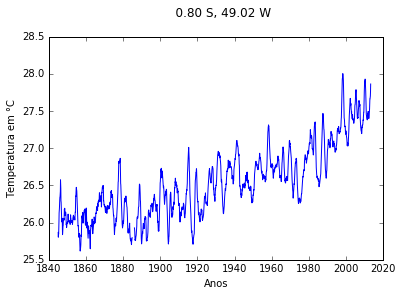

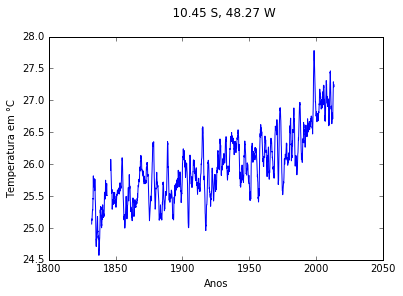

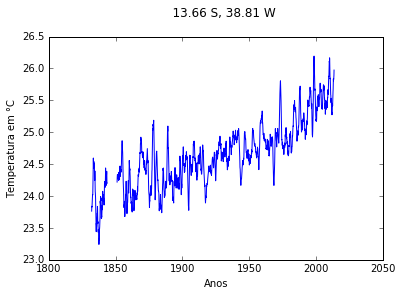

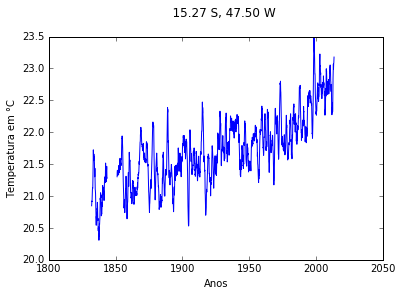

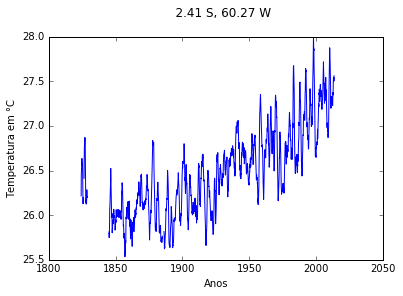

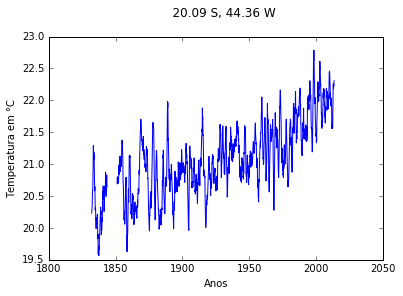

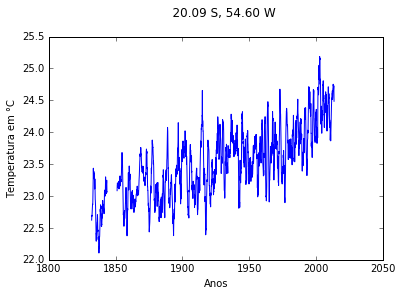

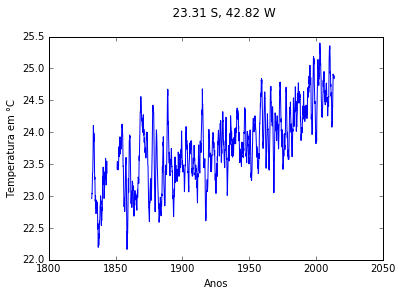

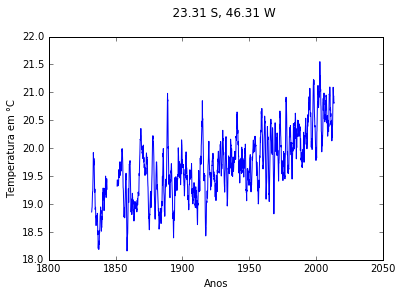

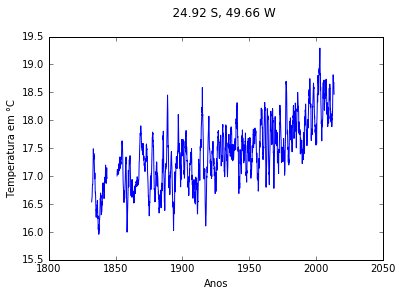

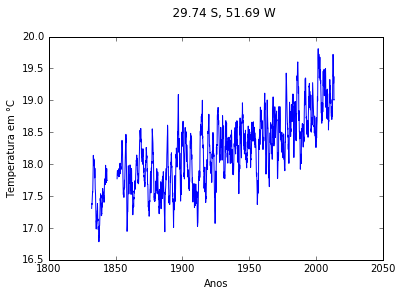

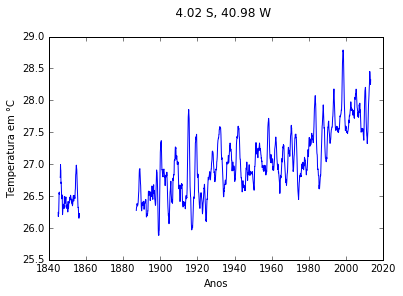

In [312]:
for arquivo in arquivos:
    graficos(arquivo)